<a href="https://colab.research.google.com/github/yashaswi2000/Text_summarisation/blob/master/Ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os

In [0]:
 ! pip install -q kaggle

In [76]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"makulayashaswi","key":"bb915eb90d35cc5dddc88c940585192e"}'}

In [77]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [79]:
!kaggle datasets download -d pariza/bbc-news-summary

bbc-news-summary.zip: Skipping, found more recently modified local copy (use --force to force download)


In [80]:
!unzip bbc-news-summary.zip

Archive:  bbc-news-summary.zip
replace BBC News Summary/News Articles/business/001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [81]:
data_path = "./BBC News Summary"
folders = os.listdir(data_path)
article_path = os.path.join(data_path,folders[0])
summary_path = os.path.join(data_path,folders[1])
categories = os.listdir(article_path)
article_list = []
summary_list = []
for i in categories:
  article_files = os.listdir(article_path + '/' + i)
  summary_files = os.listdir(summary_path + '/' + i)
  for j in range(len(article_files)):
    file_path_1 = article_path + '/' + i + '/' + article_files[j]
    file_path_2 = summary_path + '/' + i + '/' + summary_files[j]
    #print(file_path_1)
    try:
        
        f = open(file_path_1)
        article_list.append(' '.join(f.read().splitlines()))
        f = open(file_path_2)
        summary_list.append(' '.join(f.read().splitlines()))
        
    except:
        print("error") 
d = {'article':article_list,'summary':summary_list}
df = pd.DataFrame(d)
df

error


,article,summary
0,Ivanovic seals Canberra victory Serbia's Ana Ivanovic captured her first WTA title with a straight-sets victory over Hungarian Melinda Czink in the final of the Canberra Classic. The 17-year-old...,Serbia's Ana Ivanovic captured her first WTA title with a straight-sets victory over Hungarian Melinda Czink in the final of the Canberra Classic.Ivanovic beat Czink in the last round of qualifyin...
1,"Wales want rugby league training Wales could follow England's lead by training with a rugby league club. England have already had a three-day session with Leeds Rhinos, and Wales are thought to ...","Kel Coslett, who famously moved from Wales to league in the 1960s, is currently Saints' football manager, while Clive Griffiths - Wales' defensive coach - is a former St Helens player and is thoug..."
2,"Time to get tough on friendlies? For an international manager, a friendly provides an important opportunity to work with your players. The only problem is that the game itself can often be a far...","Some people have been saying it would be better to get the players together for the week, and do away with the 90 minutes at the end.I would say it's 50-50 whether you should have these games or n..."
3,Disappointed Scott in solid start Allan Scott is confident of winning a medal at next week's European Indoor Championships after a solid debut on the international circuit. The 22-year-old Scot ...,Vivancos slashed his personal best to equal the Spanish record with a time of 7.60secs while Kronberg and Dorival clocked 7.62secs and 7.63secs respectively.He won his heat in 7.64secs but ran 0.0...
4,Laporte tinkers with team France coach Bernard Laporte has made four changes to the starting line-up that beat England for Saturday's Six Nations clash with Wales. He opted for Yannick Nyanga in...,"Other changes see Julien Laharrague win his first cap at full-back, Aurelien Rougerie return after injury on the wing and Yannick Jauzion in at centre.""The return of Jauzion is going to be a plus ..."
...,...,...
2219,"Millions 'to lose textile jobs' Millions of the world's poorest textile trade workers will lose their jobs under new trade rules to be introduced in the new year, a charity has warned. The World...",The WTO said that many developing countries support the end of quotas and stressed that funding was available to countries such as Bangladesh to help them make the transition to a fully liberalise...
2220,"Business fears over sluggish EU economy As European leaders gather in Rome on Friday to sign the new EU constitution, many companies will be focusing on matters much closer to home - namely how t...","In Germany, industry is exporting more these days, but the economy as a whole is once again mired in slow growth and high unemployment.But Germany needs much more reform if all its industry is to ..."
2221,"Warning over US pensions deficit Taxpayers may have to bail out the US agency that protects workers' pension funds, leading economists have warned. With the Pension Benefit Guaranty Corporation ...","With the Pension Benefit Guaranty Corporation (PBGC) some £23bn (£12m) in deficit, the Financial Economists Roundtable (FER) wants Congress to act.The company has an estimated $2.9bn hole in its p..."
2222,Christmas shoppers flock to tills Shops all over the UK reported strong sales on the last Saturday before Christmas with some claiming record-breaking numbers of festive shoppers. A spokesman fo...,"A spokesman for Manchester's Trafford Centre said it was ""the biggest Christmas to date"" with sales up 5%.""I do think this has had a lot to do with reports of lower sales figures,"" she said.""Our s..."


In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


In [83]:
df['article'][:10]

0    Ivanovic seals Canberra victory  Serbia's Ana Ivanovic captured her first WTA title with a straight-sets victory over Hungarian Melinda Czink in the final of the Canberra Classic.  The 17-year-old...
1    Wales want rugby league training  Wales could follow England's lead by training with a rugby league club.  England have already had a three-day session with Leeds Rhinos, and Wales are thought to ...
2    Time to get tough on friendlies?  For an international manager, a friendly provides an important opportunity to work with your players.  The only problem is that the game itself can often be a far...
3    Disappointed Scott in solid start  Allan Scott is confident of winning a medal at next week's European Indoor Championships after a solid debut on the international circuit.  The 22-year-old Scot ...
4    Laporte tinkers with team  France coach Bernard Laporte has made four changes to the starting line-up that beat England for Saturday's Six Nations clash with Wales.  He opted 

In [84]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [86]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in df['article']:
    cleaned_text.append(text_cleaner(t))

cleaned_text[0]

'ivanovic seals canberra victory serbia ana ivanovic captured first wta title straight sets victory hungarian melinda czink final canberra classic year old took minutes take match ivanovic beat czink last round qualifying hungarian made main draw lucky loser katarina srebotnik withdrew injured ivanovic said really nervous beginning pulled much wrong junior wimbledon finalist last year added first wta title win really given energy practice improve ivanovic play seed iveta benesova czech republic first round said australian open melbourne'

In [87]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in df['summary']:
    cleaned_summary.append(summary_cleaner(t))

cleaned_summary[0]

'serbia ana ivanovic captured her first wta title with straight sets victory over hungarian melinda czink in the final of the canberra classic ivanovic beat czink in the last round of qualifying but the hungarian made the main draw as lucky loser after katarina srebotnik withdrew injured junior wimbledon finalist last year she added it my first wta title and to win it has really given me more energy to practice and improve '

In [0]:
df['cleaned_article']=cleaned_text
df['cleaned_summary']=cleaned_summary

In [0]:
df['cleaned_summary'] = df['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [90]:
for i in range(5):
    print("article:",df['cleaned_article'][i])
    print("Summary:",df['cleaned_summary'][i])
    print("\n")

article: ivanovic seals canberra victory serbia ana ivanovic captured first wta title straight sets victory hungarian melinda czink final canberra classic year old took minutes take match ivanovic beat czink last round qualifying hungarian made main draw lucky loser katarina srebotnik withdrew injured ivanovic said really nervous beginning pulled much wrong junior wimbledon finalist last year added first wta title win really given energy practice improve ivanovic play seed iveta benesova czech republic first round said australian open melbourne
Summary: _START_ serbia ana ivanovic captured her first wta title with straight sets victory over hungarian melinda czink in the final of the canberra classic ivanovic beat czink in the last round of qualifying but the hungarian made the main draw as lucky loser after katarina srebotnik withdrew injured junior wimbledon finalist last year she added it my first wta title and to win it has really given me more energy to practice and improve  _END_

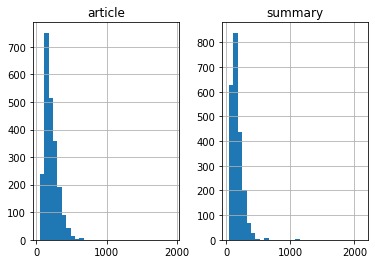

In [91]:
import matplotlib.pyplot as plt
article_word_count = []
summary_word_count = []

for i in df['cleaned_article']:
      article_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'article':article_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [92]:
import statistics
statistics.mode(article_word_count)


128

In [93]:

statistics.mode(summary_word_count)

90

In [0]:
max_len_article= 128
max_len_summary= 90

In [95]:
df['cleaned_article'][:10]

0    ivanovic seals canberra victory serbia ana ivanovic captured first wta title straight sets victory hungarian melinda czink final canberra classic year old took minutes take match ivanovic beat czi...
1    wales want rugby league training wales could follow england lead training rugby league club england already three day session leeds rhinos wales thought interested similar clinic rivals helens sai...
2    time get tough friendlies international manager friendly provides important opportunity work players problem game often farce people saying would better get players together week away minutes end ...
3    disappointed scott solid start allan scott confident winning medal next week european indoor championships solid debut international circuit year old scot finished fourth hurdles jose cagigal memo...
4    laporte tinkers team france coach bernard laporte made four changes starting line beat england saturday six nations clash wales opted yannick nyanga back row instead grand sla

In [96]:
from sklearn.model_selection import train_test_split
X_list = df['cleaned_article']
Y_list = df['cleaned_summary']
Y_list
x_tr,x_val,y_tr,y_val=train_test_split(X_list,Y_list,test_size=0.2,random_state=0,shuffle=True) 
x_tr

841     defiant hunts put ban test thousands hunt supporters first day hunting england wales ban hunting dogs came force countryside alliance called hunt supporters meet normal vowed stay within law altho...
1747    mcdonald boss bell dies aged charlie bell straight talking former head fast food giant mcdonald died cancer aged bell diagnosed colorectal cancer may last year month taking top job resigned novemb...
2117    enron bosses payout eighteen former enron directors agreed settlement deal shareholder lawsuit collapse energy firm leading plaintiff university california announced news adding former directors p...
1174    films war triumph sundance study united states war past years picked one main awards sundance film festival utah fight scooped grand jury prize documentaries world leading independent film festiva...
1502    google toolbar sparks concern search engine firm google released trial tool concerning net users directs people pre selected commercial websites autolink featur

In [0]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_article, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_article, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [0]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [111]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 
#from attention_keras.layers.attention import AttentionLayer

# Encoder 
encoder_inputs = Input(shape=(max_len_article,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
#attn_layer = AttentionLayer(name='attention_layer') 
#attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])
attn_out = tf.keras.layers.Attention()(
    [encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 128, 500)     12481000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 128, 500), ( 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [114]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50


ValueError: ignored